In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import CatBoostEncoder
from scipy.optimize import linprog

import xgboost
from sklearn.linear_model import LinearRegression
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
from sklearn.model_selection import GridSearchCV , cross_val_score

In [5]:
test_data = pd.read_csv(r'test.csv')
train_data = pd.read_csv(r'train.csv')

In [6]:
train_data.drop_duplicates(keep = 'first' , inplace = True)
test_data.drop_duplicates(keep = 'first' , inplace = True)

In [7]:
df = pd.concat([train_data , test_data] , ignore_index= True)

In [10]:
df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,1016064,ESO 383-087 (ISG 39),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4751,1016064,NGC 247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4752,1016064,ESO 325-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4753,1016064,ESO 540-032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-11-100a253afa65>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['y'], color= 'darkgreen')


<Axes: xlabel='y', ylabel='Density'>

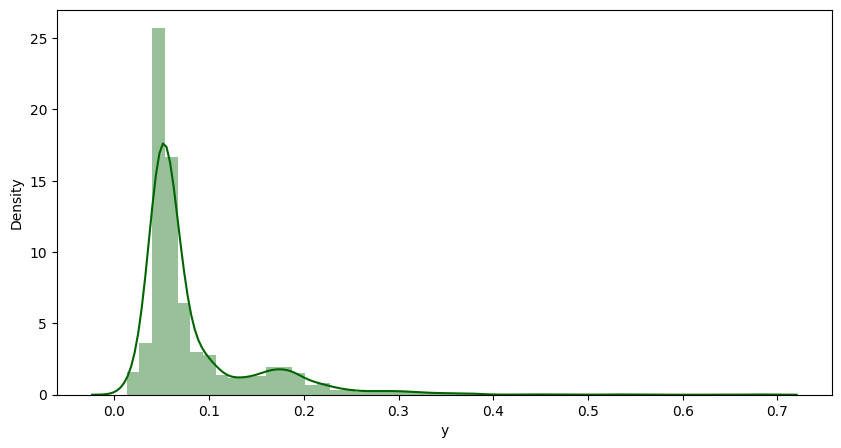

In [11]:
#Exploring the target variable
plt.figure(figsize=(10, 5))
sns.distplot(train_data['y'], color= 'darkgreen')

In [12]:
df.drop((df.isnull().sum()/ len(df)).sort_values()[(df.isnull().sum()/ len(df)).sort_values()>0.5].index , axis = 1 , inplace = True)

In [13]:
df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,NaN,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,NaN,NaN,0.154247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,1016064,ESO 383-087 (ISG 39),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4751,1016064,NGC 247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4752,1016064,ESO 325-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4753,1016064,ESO 540-032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def fill_missing(grp):
    res = grp.set_index('galactic year').\
    interpolate(method = 'linear' , limit = 5).\
    fillna(method = 'ffill').\
    fillna(method = 'bfill')
    del res['galaxy']
    return res

df = df.groupby('galaxy').apply(
lambda grp: fill_missing(grp))

df.reset_index(inplace = True)

In [15]:
df.dropna(inplace = True)

In [16]:
df

,galaxy,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),y
0,Andromeda Galaxy (M31),990025,0.759989,72.020628,18445.323465,0.647025,13.819287,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.049214
1,Andromeda Galaxy (M31),991020,0.769566,68.279470,17844.399709,0.678283,15.518075,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.048541
2,Andromeda Galaxy (M31),992016,0.791677,69.154885,17407.794954,0.658309,14.660651,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.048473
3,Andromeda Galaxy (M31),993012,0.822373,74.018880,27287.948235,0.829902,15.874337,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.048130
4,Andromeda Galaxy (M31),994009,0.838323,71.627275,18470.436157,0.578029,14.421358,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.047777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,"Wolf-Lundmark-Melotte (WLM, DDO 221)",1014049,0.714260,70.488919,18333.147138,0.614644,10.674084,4.753269,0.547468,0.328826,232.170081,86.813850,65.146359,0.039190
4751,"Wolf-Lundmark-Melotte (WLM, DDO 221)",1013042,0.731765,67.006365,15869.737839,0.677069,10.419635,4.673536,0.620506,0.532150,248.721271,81.894223,49.792374,0.039190
4752,"Wolf-Lundmark-Melotte (WLM, DDO 221)",1008016,0.737634,65.123686,25992.617277,0.602158,10.844885,6.907832,0.490640,0.390699,237.190167,87.316631,45.509292,0.039190
4753,"Wolf-Lundmark-Melotte (WLM, DDO 221)",1016064,0.771783,62.266666,12143.705835,0.628638,12.182313,7.862855,0.568157,0.462499,222.145762,101.574813,63.888855,0.039190


In [17]:
target_encoder = CatBoostEncoder().fit(df['galaxy'] , df['y'])
df['galaxy'] = target_encoder.transform(df['galaxy'])

In [18]:
df

,galaxy,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),y
0,0.037088,990025,0.759989,72.020628,18445.323465,0.647025,13.819287,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.049214
1,0.037088,991020,0.769566,68.279470,17844.399709,0.678283,15.518075,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.048541
2,0.037088,992016,0.791677,69.154885,17407.794954,0.658309,14.660651,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.048473
3,0.037088,993012,0.822373,74.018880,27287.948235,0.829902,15.874337,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.048130
4,0.037088,994009,0.838323,71.627275,18470.436157,0.578029,14.421358,11.203402,0.720938,0.774803,184.529838,77.339461,53.442516,0.047777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,0.044125,1014049,0.714260,70.488919,18333.147138,0.614644,10.674084,4.753269,0.547468,0.328826,232.170081,86.813850,65.146359,0.039190
4751,0.044125,1013042,0.731765,67.006365,15869.737839,0.677069,10.419635,4.673536,0.620506,0.532150,248.721271,81.894223,49.792374,0.039190
4752,0.044125,1008016,0.737634,65.123686,25992.617277,0.602158,10.844885,6.907832,0.490640,0.390699,237.190167,87.316631,45.509292,0.039190
4753,0.044125,1016064,0.771783,62.266666,12143.705835,0.628638,12.182313,7.862855,0.568157,0.462499,222.145762,101.574813,63.888855,0.039190


In [30]:
y = df['y']
X = df.drop('y' , axis = 1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)

In [33]:
def calculate_scores(pred, actuals) :
  r2 = r2_score(pred, actuals)
  mae = mean_absolute_error(pred , actuals)
  mse = mean_squared_error(pred , actuals)
  return {'R Squared: ' : r2 , 'MAE: ' : mae , 'MSE: ' : mse}

In [34]:
calculate_scores(pred_lr, y_test)

{'R Squared: ': 0.8931974935840743,
 'MAE: ': 0.012905135725428757,
 'MSE: ': 0.0005108130520199541}

# Optimization

In [46]:
param_grid = {
    'copy_X': [True , False],
    'fit_intercept':[True , False],
    'n_jobs' : [-1 ,1, 2 ] ,
     'positive' : [True , False]
}

linear_regression = LinearRegression()
grid_search = GridSearchCV(linear_regression , param_grid , cv = 5 , scoring = 'neg_mean_squared_error')
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, 1, 2],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False}

In [48]:
lr_model = LinearRegression(copy_X = True , fit_intercept = False , n_jobs = -1, positive = False)
lr_model.fit(X_train , y_train)

predictions = lr_model.predict(X_test)

In [49]:
calculate_scores(predictions, y_test)

{'R Squared: ': -0.5433118462340132,
 'MAE: ': 0.08294853717536599,
 'MSE: ': 0.007381323349503276}